In [1]:
!pip install tensorflow-gpu==2.5
# import keras==2.2.4
import numpy as np  
import pandas as pd 
import re           
import os
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")
!pip install wget
import wget
import nltk

2022-04-09 16:39:52.913832: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-09 16:39:52.913880: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data=pd.read_json("/home/jazzyy/Desktop/gujarati_train.jsonl",lines=True)
# data[['url','summary']].sample(5)

In [3]:
data[['text','summary']].sample(5)

,text,summary
1901,પીડિતોને ન્યાય અપાવવા જનમેદની એકઠી થઈ હતી. આટલું જ નહીં આ મામલે ન્યાય ન મળે તો ગઢવી સમાજની બહુમતીવાળાં કચ્છનાં ગામોમાં સમાજ દ્વારા આવનારા દિવસોમાં યોજાનારી સ્થાનિકસ્વરાજની ચૂંટણીનો બહિષ્કાર કરવાની...,કચ્છના મુંદ્રા નજીકના સમઘોઘા ગામના ગઢવી સમાજના બે યુવાનોના કથિત પોલીસ અત્યાચાર બાદ મૃત્યુ નીપજતાં ગઢવી સમાજ દ્વારા દોષિતો સામે કાર્યવાહીની માગ સાથે મુંદ્રા-બંધનું એલાન કરાયું છે.
4554,આ દરમિયાન ગામ છોડીને અન્યત્ર વસી ગયેલા મૂળનિવાસીઓ અહીં આવે છે અને ઉત્સવ મનાવે છે. કુર્દી ગામ પશ્ચિમીઘાટના બે પહાડો વચ્ચે સાલૌલિમ નદી પાસે વસેલું છે. દક્ષિણ પૂર્વી ગોવાનું આ ગામ એક સમયે બહુત જીવંત ...,ગોવામાં એક ગામ એવું છે વર્ષ દરમિયાન 11 મહિના પાણીની અંદર રહે છે અને માત્ર એક મહિના માટે પાણીમાંથી બહાર આવે છે.
4917,મહારાષ્ટ્રમાં મતદાનને ગણતરીના દિવસો બાકી છે ત્યારે ચૂંટણીલક્ષી રાજકારણ 3 સ્મારકોની આસપાસ ફરી રહ્યું છે. હસ્તી આ 3 ઐતિહાસિક હસ્તીઓનું મહારાષ્ટ્રના સામાજિક અને રાજકીય જીવનમાં એટલુ પ્રભુત્વ રહ્યું છે...,નેતાઓ ભૂતકાળના સંવેદનશીલ મુદ્દાઓને વારે વારે યાદ કરીને વોટ મેળવવાનો પ્રયાસ કરતા હોય છે.
2896,પ્રતીકાત્મક ફાઇલ તસવીર ચૂંટણીકાર્યક્રમની જાહેરાતની સાથે જ આદર્શ આચાર સંહિતાનો અમલ શરૂ થઈ જશે અને તંત્ર પરની સત્તા સરકાર પાસેથી પંચ પાસે આવી જશે. દરમિયાન ચૂંટણીની તારીખો આ મુજબ છે : આસામ ચૂંટણીની ત...,"આજે કેન્દ્રીય ચૂંટણીપંચ દ્વારા પત્રકારપરિષદ સંબોધવામાં આવી હતી. પંચ દ્વારા પશ્ચિમ બંગાળ, તામિલનાડુ, કેરળ અને આસામ ઉપરાંત કેન્દ્રશાસિત પ્રદેશ પુડ્ડુચેરીમાં વિધાનસભા ચૂંટણીનો કાર્યક્રમ જાહેર કરી દેવ..."
1419,રાજ ઠાકરે આ નિવેદન મહારાષ્ટ્ર નવનિર્માણ સેના(મનસે)ના વડા રાજ ઠાકરેનું છે. તેમનો ઈશારો પાકિસ્તાન તથા બાંગ્લાદેશમાંથી આવેલા ઘૂસણખોરો તરફ હતો. રાજ ઠાકરેએ આ નિવેદન ગત ગુરુવારે મુંબઈના ગોરેગાંવમાં યોજા...,"""મજાની વાત એ છે કે અમેરિકન તથા બ્રિટિશ પાસપોર્ટ ધરાવતા લોકોએ કોઈ પણ દેશમાં જવા માટે વિઝા લેવા પડતા નથી, પણ ભારત આવવા માટે વિઝા લેવા પડે છે. હવે જુઓ. આપણે ત્યાં અહીં-તહીંથી લોકો આવી રહ્યા છે. અહીં ..."


In [4]:
data.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
data.dropna(axis=0,inplace=True)

In [5]:
from spacy.lang.gu import Gujarati

In [6]:
from spacy.lang.gu.stop_words import STOP_WORDS

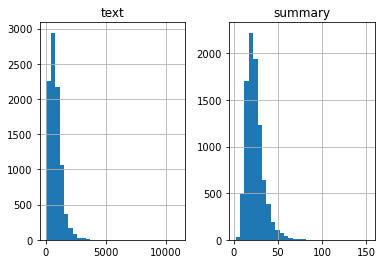

In [7]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in data['text']:
      text_word_count.append(len(i.split()))

for i in data['summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})

length_df.hist(bins = 30)
plt.show()

In [41]:

cnt=0
for i in data['summary']:
    if(len(i.split())<=40):
        cnt=cnt+1
print(cnt/len(data['summary']))

0.9415441982890985


In [42]:
max_text_len=300
max_summary_len=40

In [10]:
cleaned_text =np.array(data['text'])
cleaned_summary=np.array(data['summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [11]:
df['summary'] = df['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [12]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(df['text']),np.array(df['summary']),test_size=0.1,random_state=0,shuffle=True) 

In [13]:
from keras.layers import Layer

In [14]:
# Preparing the Tokenizer
# A tokenizer builds the vocabulary and converts a word sequence to an integer sequence. Go ahead and build tokenizers for text and summary:

# Text Tokenizer
!pip install keras==2.4.3
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer() 
x_tokenizer.fit_on_texts(list(x_tr))

In [15]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)


% of rare words in vocabulary: 80.09016021275215
Total Coverage of rare words: 16.2804828061783


In [16]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
x_voc   =  x_tokenizer.num_words + 1

In [17]:
x_voc

6140

In [18]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_tr))

In [19]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 91.6996494402352
Total Coverage of rare words: 39.356295878035006


In [20]:
#prepare a tokenizer for reviews on training data
y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
y_tokenizer.fit_on_texts(list(y_tr))

#convert text sequences into integer sequences
y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')

#size of vocabulary
y_voc  =   y_tokenizer.num_words +1

In [21]:
y_tokenizer.word_counts['sostok'],len(y_tr)  

(1425, 1425)

In [22]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [23]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [24]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [25]:
from keras import backend as K 
K.clear_session()

latent_dim = 300
embedding_dim=100

# Encoder
encoder_inputs = Input(shape=(max_text_len,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

# Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# Concat attention input and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary() 

2022-04-09 16:40:33.420512: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-04-09 16:40:33.460021: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-04-09 16:40:33.460075: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Lenovo-Legion-Y540-15IRH-PG0): /proc/driver/nvidia/version does not exist
2022-04-09 16:40:33.460424: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 100)     614000      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 300, 300), ( 481200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [26]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [27]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [28]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=25,callbacks=[es],batch_size=16, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

2022-04-09 16:41:59.116142: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-09 16:41:59.147247: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz


Epoch 1/25
90/90 [==============================] - 561s 6s/step - loss: 0.9487 - val_loss: 0.6853
Epoch 2/25
90/90 [==============================] - 550s 6s/step - loss: 0.7288 - val_loss: 0.6699
Epoch 3/25
90/90 [==============================] - 548s 6s/step - loss: 0.6962 - val_loss: 0.6534
Epoch 4/25
90/90 [==============================] - 551s 6s/step - loss: 0.6750 - val_loss: 0.6325
Epoch 5/25
90/90 [==============================] - 548s 6s/step - loss: 0.6586 - val_loss: 0.6246
Epoch 6/25
90/90 [==============================] - 547s 6s/step - loss: 0.6453 - val_loss: 0.6219
Epoch 7/25
90/90 [==============================] - 547s 6s/step - loss: 0.6348 - val_loss: 0.6249
Epoch 8/25
90/90 [==============================] - 546s 6s/step - loss: 0.6247 - val_loss: 0.6213
Epoch 9/25
90/90 [==============================] - 546s 6s/step - loss: 0.6149 - val_loss: 0.6117
Epoch 10/25
90/90 [==============================] - 547s 6s/step - loss: 0.6056 - val_loss: 0.6131
Epoch 11/

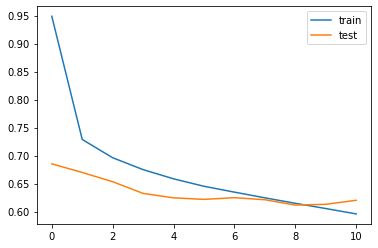

In [29]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [31]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [32]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [33]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [45]:
for i in range(0,100):
    print("Review:",seq2text(x_tr[i]))
    print("\n")
 
    print("Original summary:",seq2summary(y_tr[i]))
    print("\n")
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")
    print("\n")

Review: ભારે વરસાદને કારણે બ્રિજ તૂટી પડ્યો હતો જેમાં 39 લોકોનાં મૃત્યુ થયાં હતાં પુલ તૂટી કારણે લગભગ 40 વાહન 45 મીટર ફૂટ નીચે હતા અધિકારીઓના જણાવ્યા અનુસાર 12 લોકો હજી પણ લાપતા છે ઘટના મળેલા અહેવાલો અનુસાર ફસાયેલા લોકોના અવાજ રહ્યા છે ફસાયેલાં લોકોને બહાર કાઢવા માટે આખી રાત રાહત અને બચાવ કાર્ય સ્થળ પર 300 કર્મચારીઓ બચાવ કાર્યમાં જોડાયા છે ફસાયેલાં લોકોને શોધવા માટે પણ મદદ લેવાઈ છે વીડિયો માટે અહીં ક્લિક કરો ભારે વરસાદ દરમિયાન પુલ તૂટી પડ્યો હતો પરંતુ તેનું ચોક્કસ કારણ નથી જાણી શકાયું પરંતુ સુરક્ષા સંદર્ભે સવાલ થઈ રહ્યા છે કરતી કંપનીના ઉચ્ચ માગ થઈ રહી છે શું તમે આ વાંચ્યું કહ્યું કે ઘટના માટે જવાબદાર લોકોએ જવાબ આપવો પડશે ’ ઇમર્જન્સી અધિકારીઓના જણાવ્યા અનુસાર જ્યારે આ અકસ્માત થયો ત્યારે પુલ પરથી પસાર થઈ રહેલા વાહનો નીચે પડી ગયા સિવિલ ડિફેન્સ એજન્સીના વડા જણાવ્યું કે અકસ્માત સમયે પુલ પર 30 35 કાર અને ત્રણ ભારે વાહનો હતો ઘટનાસ્થળની તસવીરોમાં જોઈ શકાય છે કે વચ્ચેનો ભાગ તૂટી પડ્યો હતો જે પસાર થતાં રેલવે ટ્રેક પર પડ્યો હતો આ સાથે અનેક કાર તથા ટ્રક પણ નીચે હતા અન્ય એક તસવીરમાં જોઈ શકાય છે કે 

Predicted summary:  કોરોના વાઇરસની મહામારી વચ્ચે દેશમાં વધી રહ્યા છે




Review: નાઇલ કિનારા વિસ્તાર દ્વારા રાત્રિના સમયમાં માટે સેટેલાઇટ લગાડવામાં આવ્યા છે જેના ટીમે અભ્યાસ કર્યો હતો વર્ષ 2014 દરમિયાન પૃથ્વી પર રાત્રિના સમયમાં કૃત્રિમ રીતે પ્રકાશિત વિસ્તાર વાર્ષિક બે ટકાના દરે વધ્યો હતો 2012 થી 2016 દરમિયાન ભારતમાં પ્રકાશ પ્રતિક્રિયા કરવી તફાવત જોવા તસવીરને વચ્ચેથી કરો 2016 2012 વૈજ્ઞાનિકોનું કહેવું છે કે અનેક દેશોમાં છે વિશ્વમાં પ્રકાશિત અને અમેરિકા પર હતા જ્યારે દક્ષિણ અમેરિકા આફ્રિકા તથા એશિયામાં સમયમાં પ્રકાશ વધ્યો હતો માત્ર યમન અને સીરિયામાં જ કારણે પ્રકાશ ઘટ્યો છે રિસર્ચ સેન્ટર ફૉર મુખ્ય સંશોધક કહેવા પ્રમાણે પ્રકાશ મોટી શોધ હતી જેના કારણે માનવ જંગી આવ્યા છે એલ ઈ અસર લગાડવામાં આવેલા નારંગી રંગની પ્રકાશ શકે છે પરંતુ તેઓ એલ ઈ ડી લાઇટ ને શકતા નથી આથી લાગતું હતું કે એલ ઈ કારણે શહેરમાં પ્રકાશ ઘટ્યો હશે જોકે આવું નથી થયું ગાળા દરમિયાન વિસ્તાર સૌથી વધુ પ્રકાશિત જ રહ્યો છે અને બ્રિટન જર્મની તથા ભારતમાં રાત્રિના સમયમાં પ્રકાશિત વિસ્તાર વધ્યો છે પ્રકાશિત નદી કે દરિયા કિનારા જેવા શહેરો જોવા

Predicted summary:  વડા પ્રધાન નરેન્દ્ર મોદીએ ટ્રમ્પ અને ટ્રમ્પ અને ટ્રમ્પ કરી રહ્યા છે




Review: ટાપુ પર કારણે 40 લોકો ઘાયલ વાવાઝોડું રવિવારે સ્થાનિક સમય મુજબ સાંજે આઠ વાગ્યે હતું તેની શરૂઆત જાપાનના પશ્ચિમી શહેર પાસેથી થઈ હતી જાપાનમાં વધુ ફ્લાઇટ કૅન્સલ વાવાઝોડું પૂર્વ રાજ્યો તરફ આગળ ઘણી ફ્લાઇટ અને ટ્રેનો રદ કરવામાં આવી છે 7 5 લાખ ઘરોમાં વીજળી થઈ ગઈ છે તમે આ વાંચ્યું કે નહીં સ્ટેશનની તમામ ટ્રેન કૅન્સલ કરવામાં આવી વાવાઝોડાની અસરથી 84 લોકો ઘાયલ થયાં છે જાપાનમાં આ મહિનાની શરૂઆતમાં 25 વર્ષનું સૌથી ભયંકર વાવાઝોડું આવ્યું હતું ત્યારે એક વાર ફરીથી જાપાન વાવાઝોડાની ઝપેટમાં આવ્યું છે વરસાદ સપ્ટેમ્બરના અહીં વાવાઝોડું હતું જેના કારણે પૂરની પરિસ્થિતિ પણ પેદા થઈ હતી અને સાત લોકોનાં મોત થયાં હતાં તમે અમને ફેસબુક ઇન્સ્ટાગ્રામ યુટ્યૂબ અને ટ્વિટર પર ફોલો કરી શકો છો 


Original summary: જાપાનમાં વાવાઝોડું લોકો ઘાયલ થયાં છે સાથે વાવાઝોડું અસર થઈ છે 


Predicted summary:  કોરોના વાઇરસની મહામારી કારણે દેશમાં વધી રહ્યા છે




Review: સોશિયલ મીડિયા પર એક મૅસેજ સતત વાઇરલ થયો છે જેમાં દાવો કરવામાં આવ્યો છે ક

Predicted summary:  આ અને અને અને અને અને અને અને ટ્રમ્પ




Review: પરંતુ આ પહેલાં સોશિયલ મીડિયા પર કેટલાક ફેક સર્વે શેર થઈ રહ્યા છે એક સર્વે બીબીસીના નામે વૉટ્સએપ પર શેર કરાઈ રહ્યો છે લોકો આ બીબીસીના નામ અને તેની લિંક સાથે શેર કરી રહ્યાં છે પરંતુ આ ફેક ન્યૂઝ છે બીબીસી ભારતમાં ચૂંટણીઓ પહેલાં કે ચૂંટણી બાદ આવા કોઈ પણ પ્રકારના સર્વે કરતું નથી તેથી જો તમારી પાસે બીબીસીના નામે કોઈ પણ આવો સર્વે આવે તો તેને સાચો નહીં શું છે આ ફેક સર્વેમાં આ સર્વેમાં એવું અનુમાન કરવામાં આવ્યું છે કે વિધાનસભા ચૂંટણીમાં ભાજપની જીત થશે ભાજપ કર્ણાટકમાં સ્પષ્ટ બહુમતી અને રાજ્યમાં સરકાર બનાવશે હાલ કર્ણાટકમાં કોંગ્રેસની સરકાર છે અને ભાજપને આ ચૂંટણીમાં મુખ્ય માનવામાં આવે છે સર્વેમાં એવો દાવો કરવામાં આવ્યો છે કે કી દ્વારા કરવામાં આવેલા સર્વેમાં 10 લાખ લોકો સાથે વાત કરવામાં આવી હતી આ સર્વેમાં એક લિંક આપવામાં આવી છે જેના પર ક્લિક કરતાં બીબીસી પેજ ઓપન થાય છે આથી તમામ અમે છીએ કે બીબીસીના નામથી વૉટ્સએપ પર ફરી રહેલો આ સર્વે ફેક છે બીબીસી ગુજરાતી પર ચૂંટણી અંગે વાંચવા માટે તમે લિંક પર ક્લિક કરી શકો છો ચૂંટણી જાણો ચૂંટણી કેવ

Predicted summary:  કોરોના વાઇરસના કારણે લૉકડાઉન બાદ દેશમાં ફરી થઈ રહ્યા છે




Review: લાલબહાદુર શાસ્ત્રીએ આ જ કાર પંજાબ નેશનલ લોન ખરીદી હતી એક વખત બાળકોએ ફરિયાદ કરી કે હવે તો તમે વડા પ્રધાન છો હવે આપણી પાસે એક કાર હોવી જોઈએ એ જમાનામાં એક કાર 12 હજાર રૂપિયામાં આવતી હતી તેમણે પોતાના એક કહ્યું કે જરા જુઓ તો બૅંક ખાતામાં કેટલા રૂપિયા છે તેમના બૅંક ખાતામાં માત્ર સાત હજાર રૂપિયા હતા લાલબહાદુર દીકરા અનિલ શાસ્ત્રીએ બીબીસીને જણાવ્યું હતું જ્યારે અમને ખબર પડી કે પાસે કાર ખરીદવા માટે પર્યાપ્ત પૈસા નથી તો અમે તેમને કહ્યું કે કાર નહીં પરંતુ કહ્યું કે તેઓ બાકીના પૈસા લોન લઈને તેમણે પંજાબ નેશનલ કાર ખરીદવા માટે પાંચ હજાર રૂપિયાની લોન લીધી હતી જોકે એક વર્ષ બાદ પહેલાં જ લાલબહાદુર નિધન થયું હતું લાલબહાદુર બાદ ઇંદિરા ગાંધી વડાં પ્રધાન બન્યાં હતાં અને તેમણે સરકાર તરફથી લોન માફ કરવાની રજૂઆત કરી હતી પરંતુ તેમનાં પત્ની શાસ્ત્રીએ તેનો અસ્વીકાર કર્યો અને લાલબહાદુર ચાર વર્ષ સુધી લોન હતી અનિલ જણાવે છે કે તેમનું થયું હતું તેઓ એ કાર સાથે લઈ ગયા હતા આ કાર હજુ પણ દિલ્હી સ્થિત લાલબહાદુર રાખવામાં આવી છે અને લોકોને તે

Predicted summary:  અમેરિકાના રાષ્ટ્રપતિ ડોનાલ્ડ ટ્રમ્પ અને ટ્રમ્પ બાદ ટ્રમ્પ પર કરી રહ્યા છે




Review: જૂન 2018માં પંજાબના મુખ્યમંત્રી કેપ્ટન લોન માફીની જાહેરાત કરી હતી ત્યારે સવાલ એ છે કે શું સરકારની આ લોન ખેડૂતોને લાભ થયો છે બીબીસી સંવાદદાતા રિપોર્ટ તમે અમને ફેસબુક ઇન્સ્ટાગ્રામ યુટ્યૂબ અને ટ્વિટર પર ફોલો કરી શકો છો 


Original summary: સરકારે ધરાવતા કરી દીધી છે 


Predicted summary:  અને રાષ્ટ્રપતિ ડોનાલ્ડ ટ્રમ્પ અને ટ્રમ્પ અને ટ્રમ્પ કરી રહ્યા છે




Review: કમલ લખેલા સોશિયલ મીડિયા પર ભારે વિરોધ એક લખ્યું છે લોકો હિંસાને માર્ગે છે' આ લેખ પર પ્રતિક્રિયા આપતા ભાજપે સરખામણી હાફિઝ સાથે કરી છે આ પગલે ટ્વિટર પર ટ્રેન્ડ થવા લાગ્યા છે કેટલાક લોકો વિરોધ કરી રહ્યા છે તો કેટલાક લોકોને વાત સાચી લાગી રહી છે રાષ્ટ્રીય સંઘના પ્રો રાકેશ માફીની માગ કરી હતી યાદવે લખ્યું ઇસ્લામિક છ પણ કમલ હિંદુ આતંકવાદ પર આપી રહ્યાં છે ' સાથે જોડાયેલા સી લખ્યું એ રાહુલ વર્ઝન છે ' ટુ પત્રકાર પૂછ્યું 'જો કમલ પાસે હિંદુ આતંકવાદ અંગે કોઈ પુરાવો હોય તો તેમણે એ સમક્ષ રજૂ કરવો જોઈએ નહીં તો તેમણે માફી જોઈએ ' વિકાસ નામના યુ

Predicted summary:  કોરોના વાઇરસની મહામારી સામે વધી રહ્યા છે




Review: સાંસદ ટીમ વિલ્સને સંસદમાં તેમના ગે પ્રપોઝ કર્યું હતું આ કિસ્સો છે વચ્ચે થતાં કાયદાકીય દરજ્જો આપવા માટે સંસદમાં ચર્ચા ચાલી રહી હતી ટીમ નામના સાંસદ આ ચર્ચામાં તેમનો સૂર રહ્યા હતા તેમના ગે રેયાન તેમની બેસી આ ચર્ચા સાંભળી રહ્યા હતા તે દરમિયાન ટીમ વિલ્સને ઊંચા રેયાન પ્રપોઝ કર્યું રેયાન આ પ્રસ્તાવ અને એટલા જ ઊંચા જવાબ આપ્યો તમને આ પણ વાંચવું ગમશે આ બન્ને સાંસદો છેલ્લાં નવ વર્ષથી સંબંધો ધરાવે છે સંસદ ઑફ કાયદાકીય માન્યતા આપવા માટે ચોથી ડિસેમ્બરે ચર્ચા શરૂ થઈ હતી લગ્ન અધિકારીઓનું કહેવું છે કે ટીમ પ્રપોઝ કરનારા સૌપ્રથમ સાંસદ છે સંસદમાં ફરજ અધિકારીઓનું કહેવું છે કે ટીમ પ્રપોઝ કરનારા સૌપ્રથમ સાંસદ છે પોતાના સંબોધન દરમિયાન ભાવુક થયેલા ટીમ વિલ્સને કહ્યું મેં એક ભાષણમાં આપણા અંગત આ દ્વારા સંકેત આપ્યો હતો આવી આપણા હાથમાં છે આ એ સવાલોના જવાબ છે જે આપણે નથી પૂછી શકતા એટલે હવે માત્ર એક વાત જ રહે છે રેયાન તમે મારી સાથે લગ્ન કરશો ટીમ વિલ્સને પ્રપોઝ કર્યું તે પછી વાતાવરણ બદલાઈ ગયું હતું અન્ય સાંસદોએ આ હતું સંસદના પણ અભિનંદન આપ્યા હતા ગ

Predicted summary:  કોરોના વાઇરસની મહામારી સામે છે




Review: મહિલા સભ્યોએ શરૂઆતમાં લઈને સમાજ સુધી સંઘર્ષ કરવો પડ્યો જો કે હાલ દેશભરમાં પ્રખ્યાત થયા બાદ હવે લોકો આ મહિલાના વખાણ કરી રહ્યાં છે તમે અમને ફેસબુક ઇન્સ્ટાગ્રામ યુટ્યૂબ અને ટ્વિટર પર ફોલો કરી શકો છો 


Original summary: આ દેશભરમાં પોતાની રહ્યું છે 


Predicted summary:  આ અને અને અને અને અને અને અને ટ્રમ્પ




Review: છેલ્લા ઘણા દિવસોથી કોંગ્રેસ અને પાટીદાર અનામત આંદોલન સમિતિ વચ્ચે અનામત અંગે વાતચીત ચાલી રહી હતી તમને આ પણ વાંચવું ગમશે ગુજરાતના નાયબ મુખ્યપ્રધાન નીતિન પટેલના કહેવા પ્રમાણે હાર્દિકે કોંગ્રેસની સ્ક્રિપ્ટ છે ગુજરાતમાં કોંગ્રેસના પ્રભારી અશોક કહેવા પ્રમાણે આ અંગે હવે વડાપ્રધાન નરેન્દ્ર મોદીએ નિર્ણય લેવાનો છે આર્થિક રીતે પછાત સમાજના દરેક અનામત મળવું જોઈએ હાર્દિક પટેલે પત્રકાર પરિષદમાં શું કહ્યું તમને આ પણ વાંચવું ગમશે નીતિન પટેલે પત્રકાર પરિષદમાં શું કહ્યું હાર્દિક પટેલની પત્રકાર પરિષદ બાદ નાયબ મુખ્યમંત્રી નીતિન પટેલે પણ પત્રકાર પરિષદ સંબોધી હતી જેમાં તેમણે કહ્યું હતું કે હાર્દિક પટેલે કોંગ્રેસની સ્ક્રિપ્ટ વાંચી છે હા

Predicted summary:  અને રાષ્ટ્રપતિ ડોનાલ્ડ ટ્રમ્પ અને ટ્રમ્પ અને ટ્રમ્પ કરી રહ્યા છે




Review: આકાશ અંબાણી અને શ્લોકા મહેતા તેમનાં લગ્ન જાણીતા હીરા રસેલ સૌથી નાના પુત્રી સાથે થઈ રહ્યાં છે સમાચાર એજન્સી પીટીઆઈ મુજબ બંને પરિવારે તેમના કેટલાક નજીકના મિત્રો સાથે આયોજન કર્યું હતું આ પ્રસંગે તેમના નજીકના જ આમંત્રણ આપવામાં આવ્યું હતું અંબાણી મુકેશ અંબાણી આકાશ અને શ્લોકા મહેતા લાંબા સમયથી લઈને વાતચીત કરી રહેલા બંને પરિવારો દ્વારા આ પાર્ટીમાં લગ્નના કાર્યક્રમને પણ અંતિમ રૂપ આપવામાં આવ્યું હતું સોશિયલ મીડિયા પર પણ આ પોસ્ટ કરવામાં આવી છે આ કાર્યક્રમમાં મુકેશ અને સાથે મુકેશ માતા પણ હાજર હતાં આ સમાચાર આવવાની સાથે જ લોકોમાં એ જાણવાની વધી ગઈ છે કે આકાશ લગ્ન જેમની સાથે નક્કી થયાં છે તે કોણ છે વેપારી છે પિતા શ્લોકા રસેલ મહેતા અને ત્રીજું છે રસેલ મહેતા ડિરેક્ટર છે તેમની ગણતરી વિશ્વના મોટા હીરા થાય છે અંબાણી અને મહેતા પરિવાર ખૂબ જ છે આકાશ અને શ્લોકા બંનેએ અંબાણી ઇન્ટરનેશનલ સ્કૂલમાં એક સાથે અભ્યાસ કર્યો હતો પિતા એમ 1960માં મુંબઈમાં બી એન્ડ કંપનીની સ્થાપના કરી હતી પણ બી નામથી જ પોતાનો શરૂ કર્યો હતો ત્યાર

Predicted summary:  અમેરિકાના રાષ્ટ્રપતિ ડોનાલ્ડ ટ્રમ્પ અને ટ્રમ્પ અને ટ્રમ્પ પર કરી રહ્યા છે




Review: ગુજરાત રાજ્યમાં લૉકડાઉન જેવા પ્રતિબંધો 29 શહેરોમાં લાદવામાં આવ્યા છે 29 શહેરોમાં કર્ફ્યુ ઉપરાંત નિયંત્રણો મૂકવાની રાજ્ય સરકાર દ્વારા જાહેરાત કરવામાં આવી છે આ નિયંત્રણો 28 એપ્રિલ 2021 મે 2021 સુધી રહેશે રાજ્ય સરકાર દ્વારા જણાવાયું છે કે આ નિયંત્રણો દરમિયાન 29 શહેરોમાં તમામ આવશ્યક સેવાઓ ચાલુ રહેશે ભારત સરકારના ગૃહ મંત્રાલયની 26 સંદર્ભે આ નિર્ણય મુખ્ય મંત્રી વિજય અધ્યક્ષતામાં યોજાયેલી બેઠકમાં આ નિર્ણય લેવામાં આવ્યો છે આ બેઠકમાં મંત્રી જાડેજા મુખ્ય સચિવ અનિલ મુખ્ય સચિવ પોલીસ મહાનિદેશક આરોગ્ય વિભાગના સચિવ ડૉ રવિ અધિકારીઓ ઉપસ્થિત રહ્યાં હતાં નવા આદેશ પ્રમાણે નવસારી પોરબંદર બોટાદ અને સોમનાથ સહિત કુલ 29 શહેરોમાં રાત્રિના 8થી સવારના 6 વાગ્યા સુધી કર્ફ્યુ રહેશે શું છે પ્રતિબંધો અને શું રહેશે શું બંધ તમે અમનેફેસબુક ઇન્સ્ટાગ્રામ યૂટ્યૂબ અને ટ્વિટર પર ફોલો કરી શકો છો 


Original summary: ગુજરાત આઠ સહિત 20 શહેરોમાં સહિત હવે શહેરોમાં જાહેરાત ગુજરાત સરકાર દ્વારા કરાઈ છે 


Predicted summary:  અમેર